## Exploratory Data Analysis & Intro

### Goal

* 1. Investigate top-paying roles and skills in Data Analysis
* 2. Use python for exploring a real-live dataset on the job postings.
* 3. For job-seekers: use these insights to help find the best job opportunities.


### Questions to Answer
* 1. What are the most demanded skills for the top 3 most popular data roles?
* 2. How are in-demand skills trending for Data Analysts?
* 3. How well do jobs and skills pay for Data Analysts?
* 4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)


In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  #to convert str to datetime 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #to convert str to list

c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Filter for US Data Analyst Roles

In [8]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

df_DA_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."


### Different Job Locations 

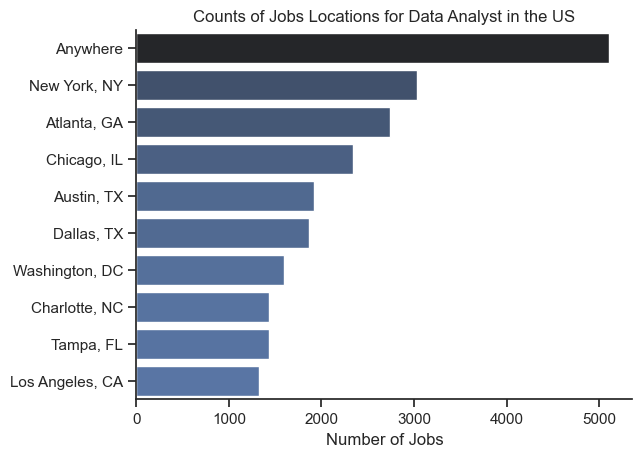

In [15]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()   #we are converting it to Dataframe so it is easier to use seaborn for plotting.count

sns.set_theme(style= 'ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue= 'count', palette= 'dark:b_r', legend=False)
sns.despine() #to remove border around the graph
plt.title('Counts of Jobs Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


### Job Opportunities

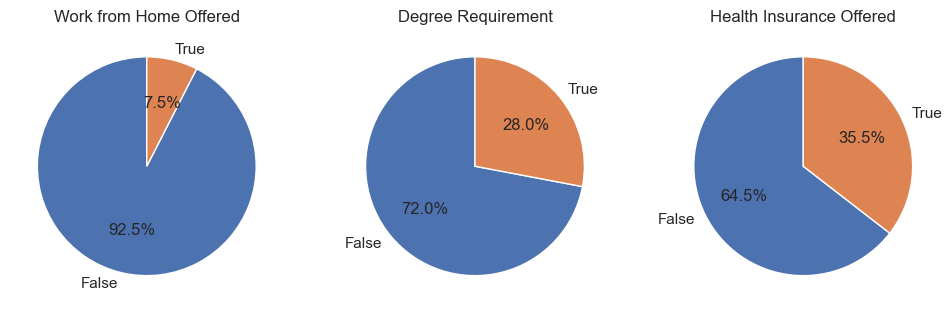

In [24]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}
fig, ax = plt.subplots(1,3, figsize= (12, 4))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels = ['False', 'True'], autopct= '%1.1f%%', startangle= 90)
    ax[i].set_title(title)  #when you are subploting use set_title insted of plt.title()


plt.show()


### Companies to Explore:

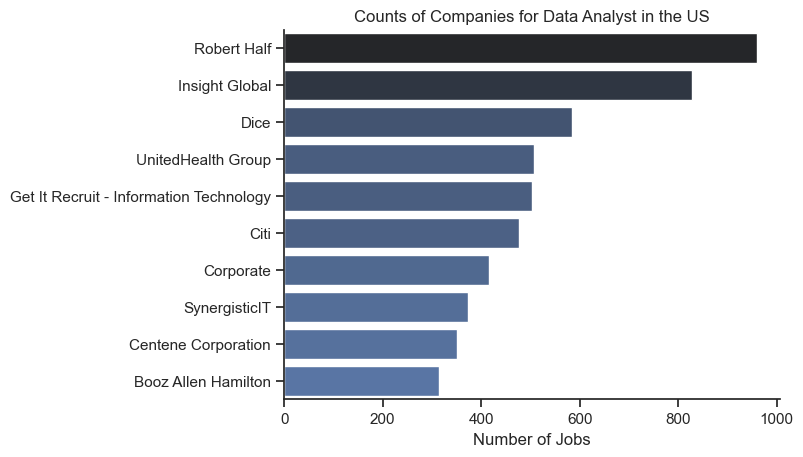

In [28]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()  

sns.set_theme(style= 'ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue= 'count', palette= 'dark:b_r', legend=False)
sns.despine() #to remove border around the graph
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()